In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Time-dependent Schrodinger equation with a square well
# Solving for the real and imaginary parts of 
# the wave function at slightly different or “staggered” times
t_N = 1
x_area = 15
num_t = 5000
num_x = 750

In [3]:
# Define the potential 
def V_pot(x,t):
    # For 0<=x<=15
    return 0*x
# def V_pot(x,t):
#     # For 0<=x<=15
#     return 0.5*(x-7.5)**2

In [4]:
# Define the initial condition
def init_cond_R(x):
    x0 = 5
    sigma0 = 0.5
#     sigma0 = 1/np.sqrt(np.pi)
    k0 = 17*np.pi
    return np.exp(-0.5*((x-x0)/sigma0)**2)*np.cos(k0*x)
def init_cond_I(x):
    x0 = 5
    sigma0 = 0.5
#     sigma0 = 1/np.sqrt(np.pi)
    k0 = 17*np.pi
    return np.exp(-0.5*((x-x0)/sigma0)**2)*np.sin(k0*x)

In [5]:
def integral_linear(x,y):
    num_x = len(x)
    num_y = len(y)
    temp = (x[1:(num_x)]-x[0:(num_x-1)])*(y[1:(num_y)]+y[0:(num_y-1)])/2
    return temp.sum()

In [6]:
R = np.zeros((2,num_x+1))
I = np.zeros((2,num_x+1))
pdf_int = np.zeros((num_t+1,2)) # pdf
pdf_int_half = np.zeros((num_t+1,2))

dt = t_N/num_t
dx = x_area/num_x

alpha = dt/(2*dx**2)

In [7]:
# Initial condition
x = np.linspace(0,x_area,num_x+1)
t = np.linspace(0,t_N,num_t+1)

R[0,:] = init_cond_R(x)
I[0,:] = init_cond_I(x)

# pdf_int[0,:] = R[0,:]**2+I[0,:]**2
# pdf_int_half[0,:] = R[0,:]**2+I[0,:]**2

Text(0, 0.5, '$|\\Psi|^{2}$')

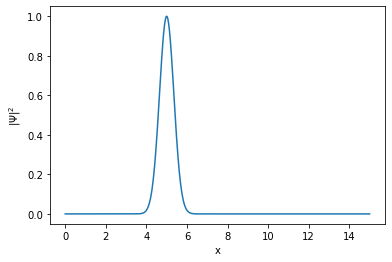

In [8]:
# Plot the initial condition
phi_2 = R[0,:]**2+I[0,:]**2
plt.plot(x,phi_2)
plt.xlabel('x')
plt.ylabel('$|\Psi|^{2}$')

t=0.0
rho (Int):0.886226925452758
rho (Half-int):0.8862269254527576
t=0.2
rho (Int):0.8862269254527578
rho (Half-int):0.8862269254527578
t=0.4
rho (Int):0.8862269254527583
rho (Half-int):0.8862269254527583
t=0.6
rho (Int):0.8862269254527584
rho (Half-int):0.8862269254527585
t=0.8
rho (Int):0.8862269254527588
rho (Half-int):0.8862269254527588
t=1.0
rho (Int):0.8862269254527588
rho (Half-int):0.886226925452759


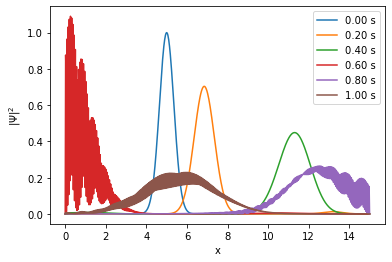

In [9]:
# R: 0,dt/2,3dt/2,5dt/2,...
# I: 0,dt,2dt,...
# BC is zero (Since it is confined in an infinite potential well)
# R(0,t)=I(0,t)=0, R(15,t)=I(15,t)=0
plot_interval = int(num_t/5)
save_num = 51
save_interval = int(num_t/(save_num-1))
# To save
rho_save = np.zeros((save_num,num_x+1))
save_index = 0
for i in range(num_t+1):
    #  Real part
    # Boundary points
    R[1,0] = 0.0
    R[1,num_x] = 0.0
    # Inner points
#     if i==0:
#         R[i+1,1:(num_x)] = R[i,1:(num_x)]+0.5*(4*alpha+V_pot(x[1:(num_x)],t[i])*dt)*I[i,1:(num_x)]\
#         -alpha*(I[i,2:(num_x+1)]+I[i,0:(num_x-1)])
#     else:
    R[1,1:(num_x)] = R[0,1:(num_x)]+(4*alpha+V_pot(x[1:(num_x)],t[i])*dt)*I[0,1:(num_x)]\
    -2*alpha*(I[0,2:(num_x+1)]+I[0,0:(num_x-1)])
    # Imaginary part
    # Boundary points
    I[1,0] = 0.0
    I[1,num_x] = 0.0
    # Inner points
    I[1,1:(num_x)] = I[0,1:(num_x)]-(4*alpha+V_pot(x[1:(num_x)],t[i]+0.5*dt)*dt)*R[1,1:(num_x)]\
    +2*alpha*(R[1,2:(num_x+1)]+R[1,0:(num_x-1)])
    # Check the normalization
    if i%plot_interval == 0:
        print('t={}'.format(t[i]))
        # Integer t
        if i>0:
            pdf_int = I[0,:]**2+R[0,:]*R[1,:]
            print('rho (Int):{}'.format(integral_linear(x,pdf_int)))
        else:
            pdf_int = I[0,:]**2+R[0,:]*R[0,:]
            print('rho (Int):{}'.format(integral_linear(x,pdf_int)))
        # Half-integer t
        pdf_int_half = R[1,:]**2+I[0,:]*I[1,:]
        print('rho (Half-int):{}'.format(integral_linear(x,pdf_int_half)))
        plt.plot(x,pdf_int,label='{:.2f} s'.format(t[i]))
    if i%save_interval == 0:
        rho_save[save_index,:] = pdf_int
        save_index += 1
    # Update
    R[0,:] = R[1,:]
    I[0,:] = I[1,:]
plt.xlabel('x')
plt.ylabel('$|\Psi|^{2}$')
plt.legend()

In [10]:
time_save = np.linspace(0,t_N,save_num)

In [11]:
# Plot surface
# T,X = np.meshgrid(time_save, x)
X,T = np.meshgrid(x,time_save)

<Figure size 432x288 with 0 Axes>

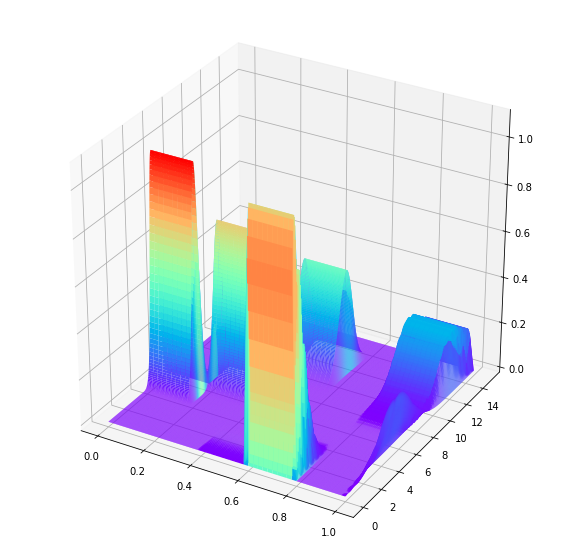

In [12]:
fig = plt.figure()  #定义新的三维坐标轴
plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
ax3.plot_surface(T,X,rho_save,rstride = 1, cstride = 1,cmap='rainbow')

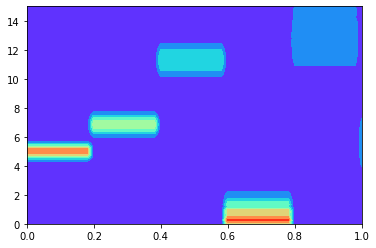

In [13]:
plt.contourf(T,X,rho_save,cmap='rainbow')